In [21]:
%matplotlib inline  
import pandas as pd
import numpy as np
import glob

### Plot the execution time as a function of the number of threads used.

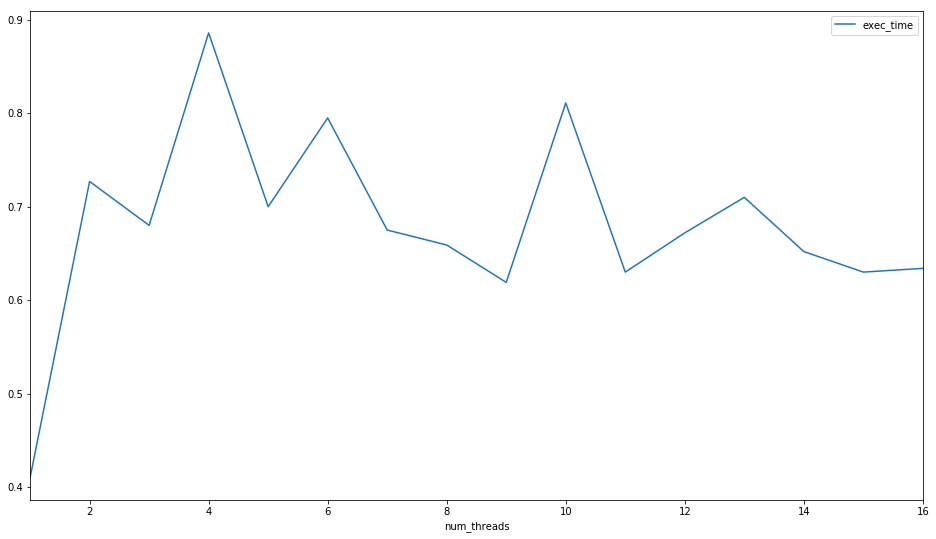

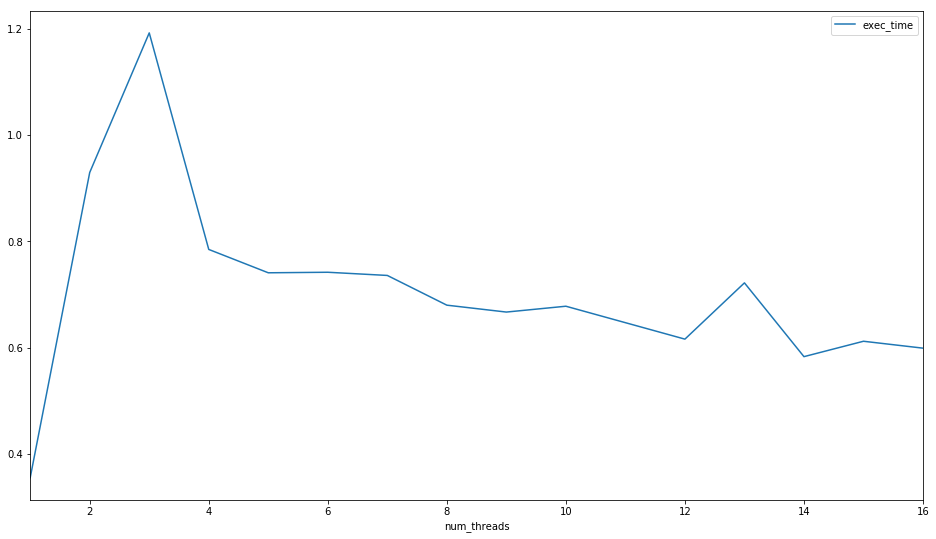

In [26]:
for benchmark_result in glob.glob("./zuse_results/benchmark_results*_montecarlo_pi.csv"):   
    df = pd.read_csv(benchmark_result)
    ax = df.plot(x="num_threads", y="exec_time", figsize=(16, 9))
    fig = ax.get_figure()
    fig.savefig(benchmark_result[:-4]+".png", dpi=300)

### Create boxplot to examine consistency of approximation over different sample counts.

In [34]:
glob.glob("./zuse_results/consistency_results*_montecarlo_pi.csv")

['./zuse_results/consistency_results_affine_montecarlo_pi.csv',
 './zuse_results/consistency_results_montecarlo_pi.csv']

In [72]:
consistency_result = "./zuse_results/consistency_results_montecarlo_pi.csv"
print "Relative Error Statistics for 100 runs."
df = pd.read_csv(consistency_result)
mean_re = df.groupby(by="num_samples").mean()["relative_error"].as_matrix()
std_re = df.groupby(by="num_samples").std()["relative_error"].as_matrix()
median_re = df.groupby(by="num_samples").median()["relative_error"].as_matrix()
stats_df = pd.DataFrame(
    data=np.array([
        df["num_samples"].unique(),
        mean_re,
        std_re,
        median_re
    ]).transpose(),
    columns=["num_samples", "mean", "std", "median"]
)

stats_df["num_samples"] = stats_df["num_samples"].astype(np.int64)
stats_df

Relative Error Statistics for 100 runs.


,num_samples,mean,std,median
0,10000,0.004739,0.002600,0.004777
1,100000,-0.000720,0.001829,-0.001004
2,1000000,0.000020,0.000425,0.000016
3,10000000,-0.000555,0.000179,-0.000540


In [71]:
consistency_result = "./zuse_results/consistency_results_affine_montecarlo_pi.csv"
print "Relative Error"
df = pd.read_csv(consistency_result)
mean_re = df.groupby(by="num_samples").mean()["relative_error"].as_matrix()
std_re = df.groupby(by="num_samples").std()["relative_error"].as_matrix()
median_re = df.groupby(by="num_samples").median()["relative_error"].as_matrix()
stats_df = pd.DataFrame(
    data=np.array([
        df["num_samples"].unique(),
        mean_re,
        std_re,
        median_re
    ]).transpose(),
    columns=["num_samples", "mean", "std", "median"]
)

stats_df["num_samples"] = stats_df["num_samples"].astype(np.int64)
stats_df

Relative Error


,num_samples,mean,std,median
0,10000,0.004712,0.002830,0.004459
1,100000,-0.000615,0.001615,-0.000494
2,1000000,-0.000146,0.000431,-0.000143
3,10000000,-0.000541,0.000236,-0.000548
